In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install pybbn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
data=pd.read_csv('weatherAUS.csv')
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
data=data.fillna(data.mean())

<ipython-input-4-2fdd91382263>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.fillna(data.mean())


In [5]:
# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [6]:
data.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
def attr_9am(x):
  if x<15:
    return 1
  elif x>=15 and x<=26:
    return 2
  else:
    return 3    


In [8]:
def attr_3pm(x):
  if x<24:
    return 1
  elif x>=24 and x<=36:
    return 2
  else:
    return 3

In [9]:
def attr_W9am(x):
  if x<16:
    return 1
  else:
    return 2
      

In [10]:
def attr_W3pm(x):
  if x<15:
    return 1
  else:
    return 2  

In [11]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [13]:
data['RainTomorrow']=data['RainTomorrow'].fillna('No')

In [14]:
data.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow         0
dtype: int64

In [15]:
'''data['Temp9am']=data['Temp9am'].apply(attr_9am)
data['Temp3pm']=data['Temp3pm'].apply(attr_3pm)
data['WindSpeed9am']=data['WindSpeed9am'].apply(attr_W9am)
data['WindSpeed3pm']=data['WindSpeed3pm'].apply(attr_W3pm)'''


"data['Temp9am']=data['Temp9am'].apply(attr_9am)\ndata['Temp3pm']=data['Temp3pm'].apply(attr_3pm)\ndata['WindSpeed9am']=data['WindSpeed9am'].apply(attr_W9am)\ndata['WindSpeed3pm']=data['WindSpeed3pm'].apply(attr_W3pm)"

In [16]:
#data

In [17]:
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob 

In [18]:
T9am=BbnNode(Variable(0,'T9am',['<=15','15-26','>26']),probs(data,child='Temp9am'))
T3pm=BbnNode(Variable(1,'T3pm',['<=24','24-36','>36']),probs(data,child='Temp3pm'))
W9am=BbnNode(Variable(2,'W9am',['<16','>=16']),probs(data,child='WindSpeed9am'))
W3pm=BbnNode(Variable(3,'W3pm',['<15','>=15']),probs(data,child='WindSpeed3pm'))
RT = BbnNode(Variable(4, 'RT', ['No', 'Yes']), probs(data, child='RainTomorrow', parent1='Temp3pm', parent2='WindSpeed3pm'))

In [19]:
# Create Network
bbn = Bbn() \
    .add_node(T9am) \
    .add_node(T3pm) \
    .add_node(W9am) \
    .add_node(W3pm) \
    .add_node(RT) \
    .add_edge(Edge(T9am, T3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(T3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(W9am, W3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(W3pm, RT, EdgeType.DIRECTED)) 

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

In [20]:
join_tree

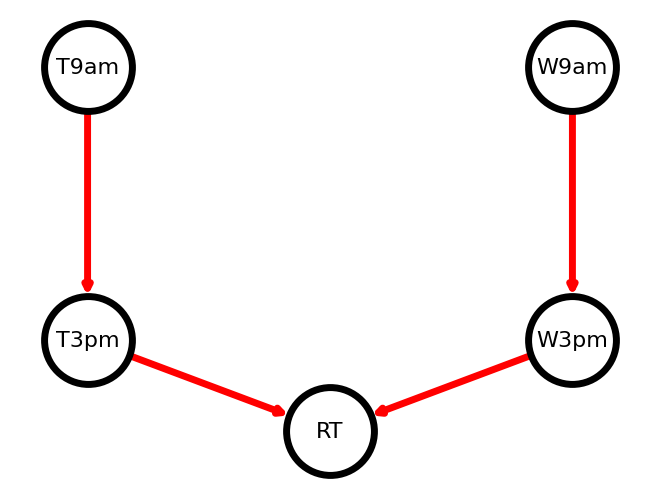

In [21]:
import networkx as nx
# Set node positions
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 2), 3: (1, 0.5),4:(0,0)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [22]:
# Define a function for printing marginal probabilities
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.43047
3=>=15|0.56953
----------------
Node: 2|W9am|<16,>=16
Values:
2=<16|0.40212
2=>=16|0.59788
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|0.33333
1=24-36|0.25000
1=>36|0.41667
----------------
Node: 0|T9am|<=15,15-26,>26
Values:
0=<=15|0.25000
0=15-26|0.25000
0=>26|0.50000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.33333
4=Yes|0.66667
----------------


In [23]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    


$\text{Evidence 1: Time: 9 am, temperature: 30}$

In [24]:
# Use above function to add evidence
evidence('ev1', 'T9am', '>26', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.43047
3=>=15|0.56953
----------------
Node: 2|W9am|<16,>=16
Values:
2=<16|0.40212
2=>=16|0.59788
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|0.33333
1=24-36|0.16667
1=>36|0.50000
----------------
Node: 0|T9am|<=15,15-26,>26
Values:
0=<=15|0.00000
0=15-26|0.00000
0=>26|1.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.33333
4=Yes|0.66667
----------------


• Evidence 2: Time: 9 am, temperature: 10

In [25]:
# Use above function to add evidence
evidence('ev2', 'T9am', '<=15', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.43047
3=>=15|0.56953
----------------
Node: 2|W9am|<16,>=16
Values:
2=<16|0.40212
2=>=16|0.59788
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|0.33333
1=24-36|0.33333
1=>36|0.33333
----------------
Node: 0|T9am|<=15,15-26,>26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.33333
4=Yes|0.66667
----------------


Evidence 3: Time: 3 pm, temperature: 26

In [28]:
# Use above function to add evidence
evidence('ev3', 'T3pm', '24-36', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.43047
3=>=15|0.56953
----------------
Node: 2|W9am|<16,>=16
Values:
2=<16|0.40212
2=>=16|0.59788
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|0.00000
1=24-36|1.00000
1=>36|0.00000
----------------
Node: 0|T9am|<=15,15-26,>26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.00000
4=Yes|1.00000
----------------


Evidence 4: Time: 3 pm, temperature: 11

In [29]:
# Use above function to add evidence
evidence('ev4', 'T3pm', '<=24', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.43047
3=>=15|0.56953
----------------
Node: 2|W9am|<16,>=16
Values:
2=<16|0.40212
2=>=16|0.59788
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|1.00000
1=24-36|0.00000
1=>36|0.00000
----------------
Node: 0|T9am|<=15,15-26,>26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|1.00000
4=Yes|0.00000
----------------


Evidence 5: Time: 9 am, Wind speed: 11


In [30]:
# Use above function to add evidence
evidence('ev5', 'W9am', '<16', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.51817
3=>=15|0.48183
----------------
Node: 2|W9am|<16,>=16
Values:
2=<16|1.00000
2=>=16|0.00000
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|1.00000
1=24-36|0.00000
1=>36|0.00000
----------------
Node: 0|T9am|<=15,15-26,>26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|1.00000
4=Yes|0.00000
----------------


• Evidence 6: Time: 3 pm, Wind speed: 19

In [32]:
# Use above function to add evidence
evidence('ev6', 'W3pm', '>=15', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|<15,>=15
Values:
3=<15|0.00000
3=>=15|1.00000
----------------
Node: 2|W9am|<16,>=16
Values:
2=<16|1.00000
2=>=16|0.00000
----------------
Node: 1|T3pm|<=24,24-36,>36
Values:
1=<=24|1.00000
1=24-36|0.00000
1=>36|0.00000
----------------
Node: 0|T9am|<=15,15-26,>26
Values:
0=<=15|1.00000
0=15-26|0.00000
0=>26|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|1.00000
4=Yes|0.00000
----------------
